# Paris Subway Ridership Data Prediction

### clean data and concatenate to pandas dataframe

1. 2015 French Open: May 24 (SUN) – Jun 7
2. 2016 French Open: May 22 (SUN) – Jun 5
3. 2017 French Open: May 28 (SUN) – Jun 11
4. 2018 French Open: May 27 (SUN) – Jun 10
5. 2019 French Open: May 26 (SUN) – Jun 9
6. 2020 French Open: Sep 24 (THU) – Oct 7 (COVID no attendance, should be remove)
7. 2021 French Open: May 30 (SUN) – Jun 13 (the data seems to be affected by COVID too)
8. 2022 French Open: May 22 (SUN) – Jun 5
3. 2023 French Open: May 28 (SUN) – Jun 11

Each French has 15 days, so each day can be forcast by two earlier years corresponding day.
For example:
input -> output
2015 May 24, 2016 May 22 -> 2017 May 28
2018 May 27, 2019 May 26 -> 2021 May 30

For other non-French Open data, we can pick other dates before May 22 and after Jun 13 to predict the ridership.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
column_map = {
    "JOUR": "DATE",
    "LIBELLE_ARRET": "STATION",
    "CATEGORIE_TITRE": "TICKET_TYPE",
    "NB_VALD": "COUNT"
}

fares_map = {'NON DEFINI':'normal', 
               'AMETHYSTE':'elderly', 
               'NAVIGO':'normal', 
               'NAVIGO JOUR':'daypass',
               'IMAGINE R':'student',
               'FGT':'subsidized', 
               '?':'normal', 
               'TST':'subsidized',
               'AUTRE TITRE':'normal'}

         DATE          STATION  COUNT
0  2015-01-01  PORTE D'AUTEUIL    271
1  2015-01-02  PORTE D'AUTEUIL    617
2  2015-01-03  PORTE D'AUTEUIL    632
3  2015-01-04  PORTE D'AUTEUIL    420
4  2015-01-05  PORTE D'AUTEUIL    829
362
May 24 – Jun 7


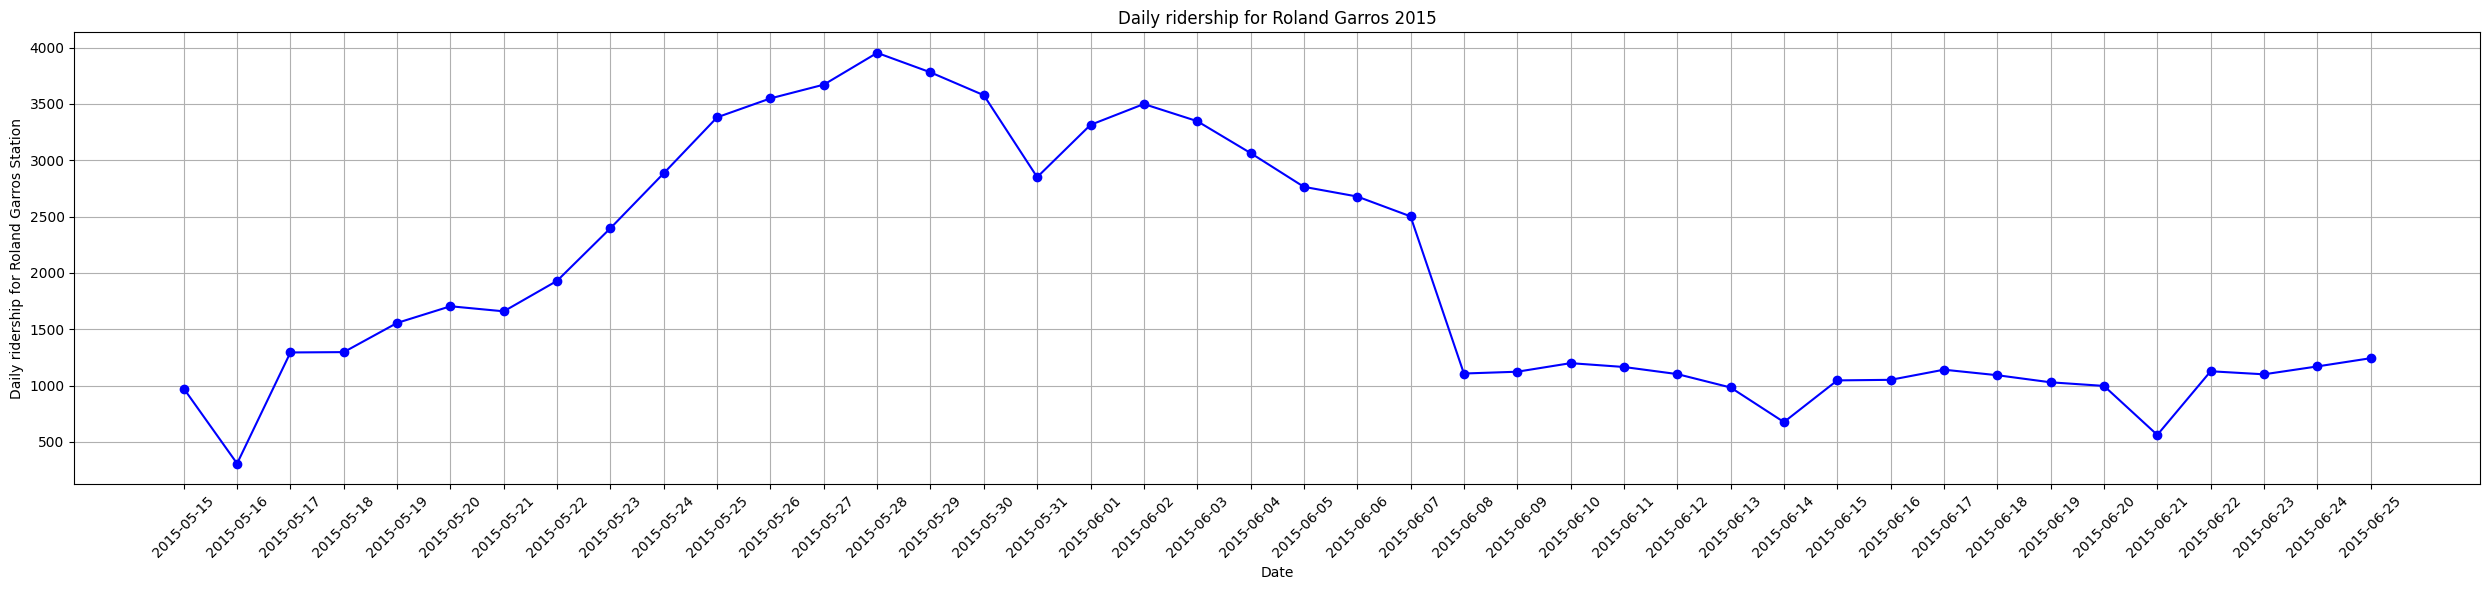

In [94]:
csv_path_2015_s1 = "../data/2015S1_NB_FER.csv"
df_2015_s1 = pd.read_csv(csv_path_2015_s1, sep=';')
df_2015_s1['JOUR'] = pd.to_datetime(df_2015_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2015_s2 = "../data/2015S2_NB_FER.csv"
df_2015_s2 = pd.read_csv(csv_path_2015_s2, sep=';')
df_2015_s2['JOUR'] = pd.to_datetime(df_2015_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2015_raw = pd.concat([df_2015_s1, df_2015_s2])
df_2015_raw = df_2015_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2015_raw["TICKET_TYPE"] = df_2015_raw["TICKET_TYPE"].replace(fares_map)
df_2015_raw["COUNT"] = df_2015_raw["COUNT"].replace("Moins de 5", 4)
df_2015_raw["COUNT"] = df_2015_raw["COUNT"].astype(int)
df_2015_raw = df_2015_raw[df_2015_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2015 = df_2015_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2015 = df_2015[["DATE", "STATION", "COUNT"]]
print(df_2015.head())
print(len(df_2015))
print("May 24 – Jun 7")
plt.figure(figsize=(25, 6))
plt.plot(df_2015[(df_2015["DATE"] >= "2015-05-15") & (df_2015["DATE"] <= "2015-06-25")]["DATE"], df_2015[(df_2015["DATE"] >= "2015-05-15") & (df_2015["DATE"] <= "2015-06-25")]["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2015")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


         DATE          STATION  COUNT
0  2016-01-01  PORTE D'AUTEUIL    173
1  2016-01-02  PORTE D'AUTEUIL    544
2  2016-01-03  PORTE D'AUTEUIL    554
3  2016-01-04  PORTE D'AUTEUIL   1029
4  2016-01-05  PORTE D'AUTEUIL   1080
364


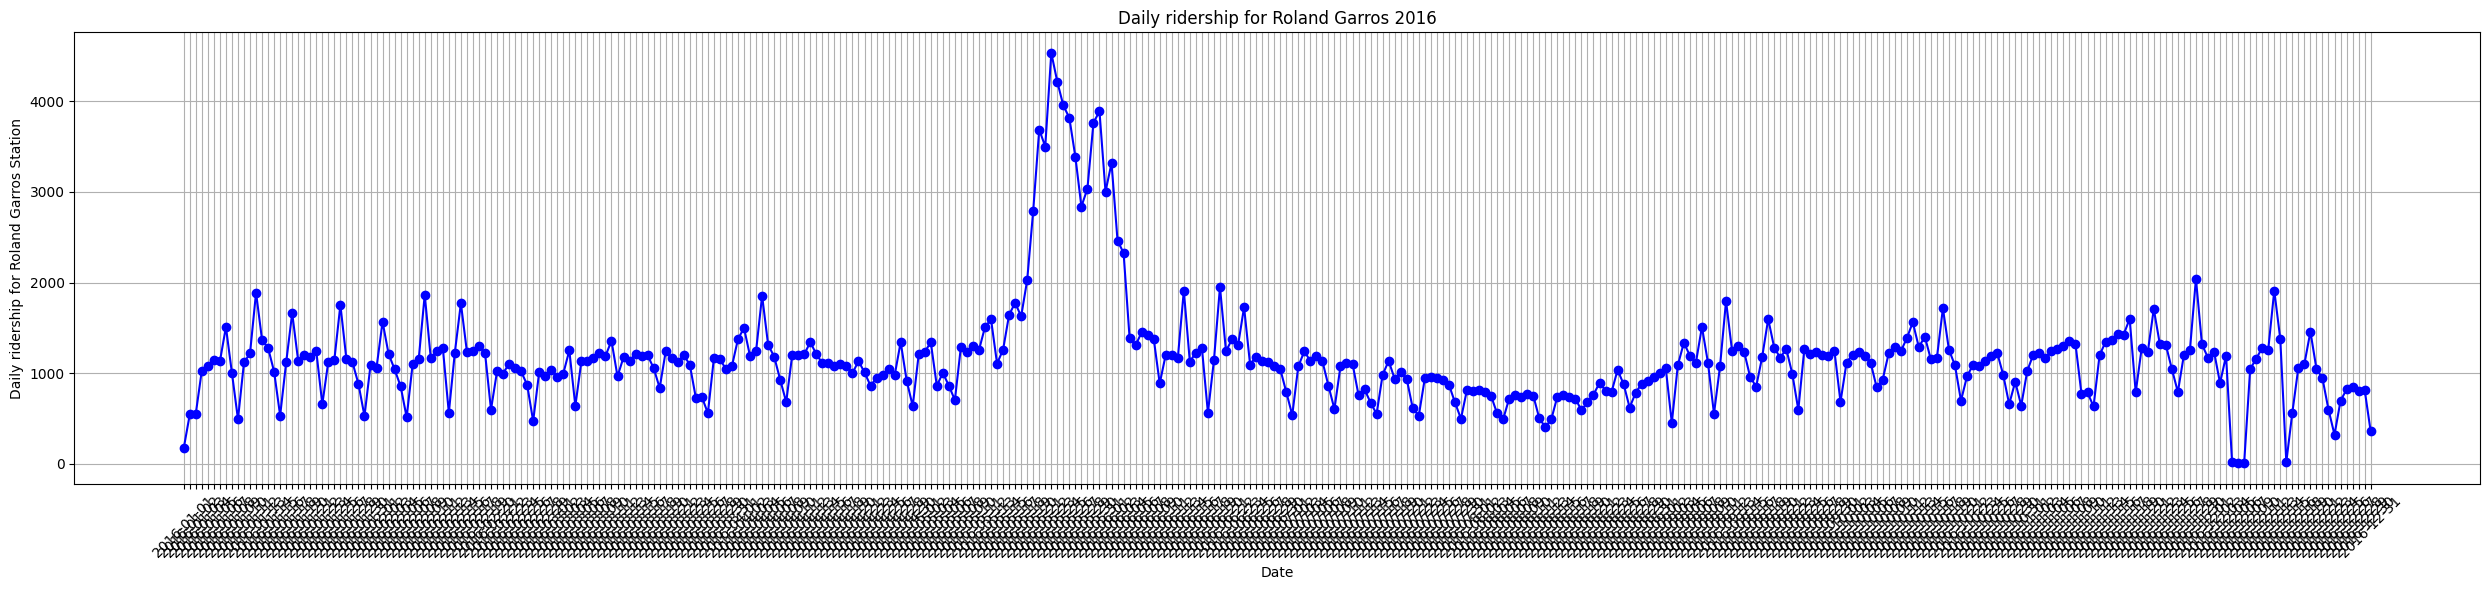

In [59]:
csv_path_2016_s1 = "../data/2016S1_NB_FER.txt"
df_2016_s1 = pd.read_csv(csv_path_2016_s1, delimiter='\t')
df_2016_s1['JOUR'] = pd.to_datetime(df_2016_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2016_s2 = "../data/2016S2_NB_FER.txt"
df_2016_s2 = pd.read_csv(csv_path_2016_s2, delimiter='\t')
df_2016_s2['JOUR'] = pd.to_datetime(df_2016_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2016_raw = pd.concat([df_2016_s1, df_2016_s2])
df_2016_raw = df_2016_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2016_raw["TICKET_TYPE"] = df_2016_raw["TICKET_TYPE"].replace(fares_map)
df_2016_raw["COUNT"] = df_2016_raw["COUNT"].replace("Moins de 5", 4)
df_2016_raw["COUNT"] = df_2016_raw["COUNT"].astype(int)
# df_2016_raw[df_2016_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2016_raw = df_2016_raw[df_2016_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2016 = df_2016_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2016 = df_2016[["DATE", "STATION", "COUNT"]]
print(df_2016.head())
print(len(df_2016))
plt.figure(figsize=(25, 6))
plt.plot(df_2016["DATE"], df_2016["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2016")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT
0  2017-01-01  PORTE D'AUTEUIL    260
1  2017-01-02  PORTE D'AUTEUIL    760
2  2017-01-03  PORTE D'AUTEUIL   1107
3  2017-01-04  PORTE D'AUTEUIL   1173
4  2017-01-05  PORTE D'AUTEUIL   1094
365


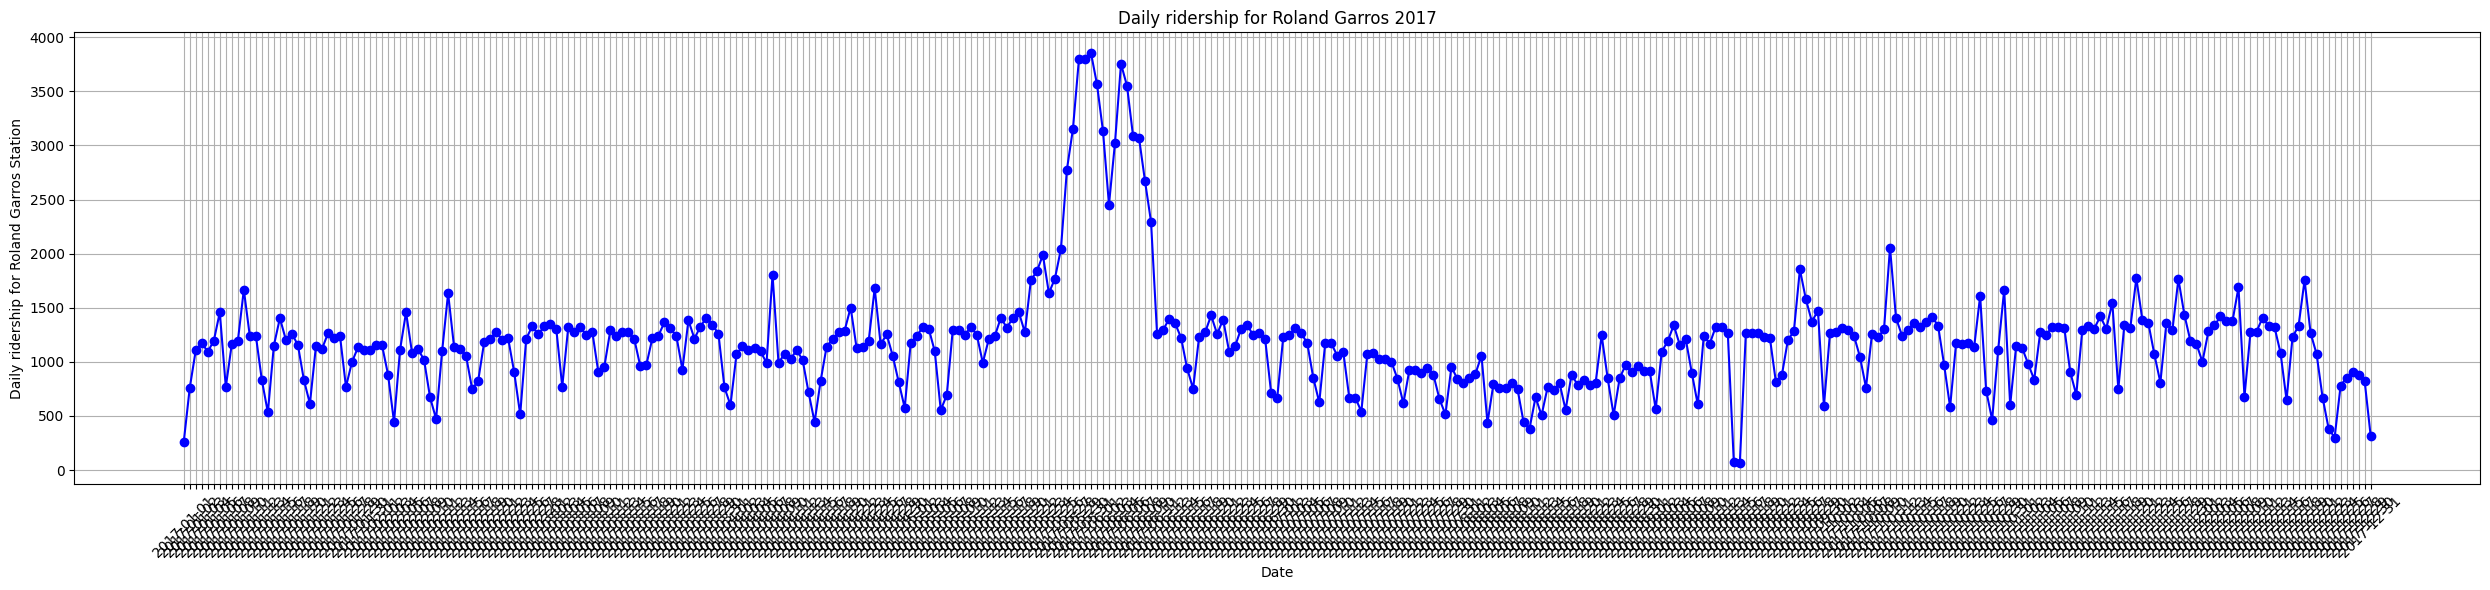

In [60]:
csv_path_2017_s1 = "../data/2017_S1_NB_FER.txt"
df_2017_s1 = pd.read_csv(csv_path_2017_s1, delimiter='\t')
df_2017_s1['JOUR'] = pd.to_datetime(df_2017_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2017_s2 = "../data/2017_S2_NB_FER.txt"
df_2017_s2 = pd.read_csv(csv_path_2017_s2, delimiter='\t')
df_2017_s2['JOUR'] = pd.to_datetime(df_2017_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2017_raw = pd.concat([df_2017_s1, df_2017_s2])
df_2017_raw = df_2017_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2017_raw["TICKET_TYPE"] = df_2017_raw["TICKET_TYPE"].replace(fares_map)
df_2017_raw["COUNT"] = df_2017_raw["COUNT"].replace("Moins de 5", 4)
df_2017_raw["COUNT"] = df_2017_raw["COUNT"].astype(int)
# df_2017_raw[df_2017_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2017_raw = df_2017_raw[df_2017_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2017 = df_2017_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2017 = df_2017[["DATE", "STATION", "COUNT"]]
print(df_2017.head())
print(len(df_2017))
plt.figure(figsize=(25, 6))
plt.plot(df_2017["DATE"], df_2017["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2017")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT
0  2018-01-01  PORTE D'AUTEUIL    221
1  2018-01-02  PORTE D'AUTEUIL    802
2  2018-01-03  PORTE D'AUTEUIL    900
3  2018-01-04  PORTE D'AUTEUIL    992
4  2018-01-05  PORTE D'AUTEUIL    971
365


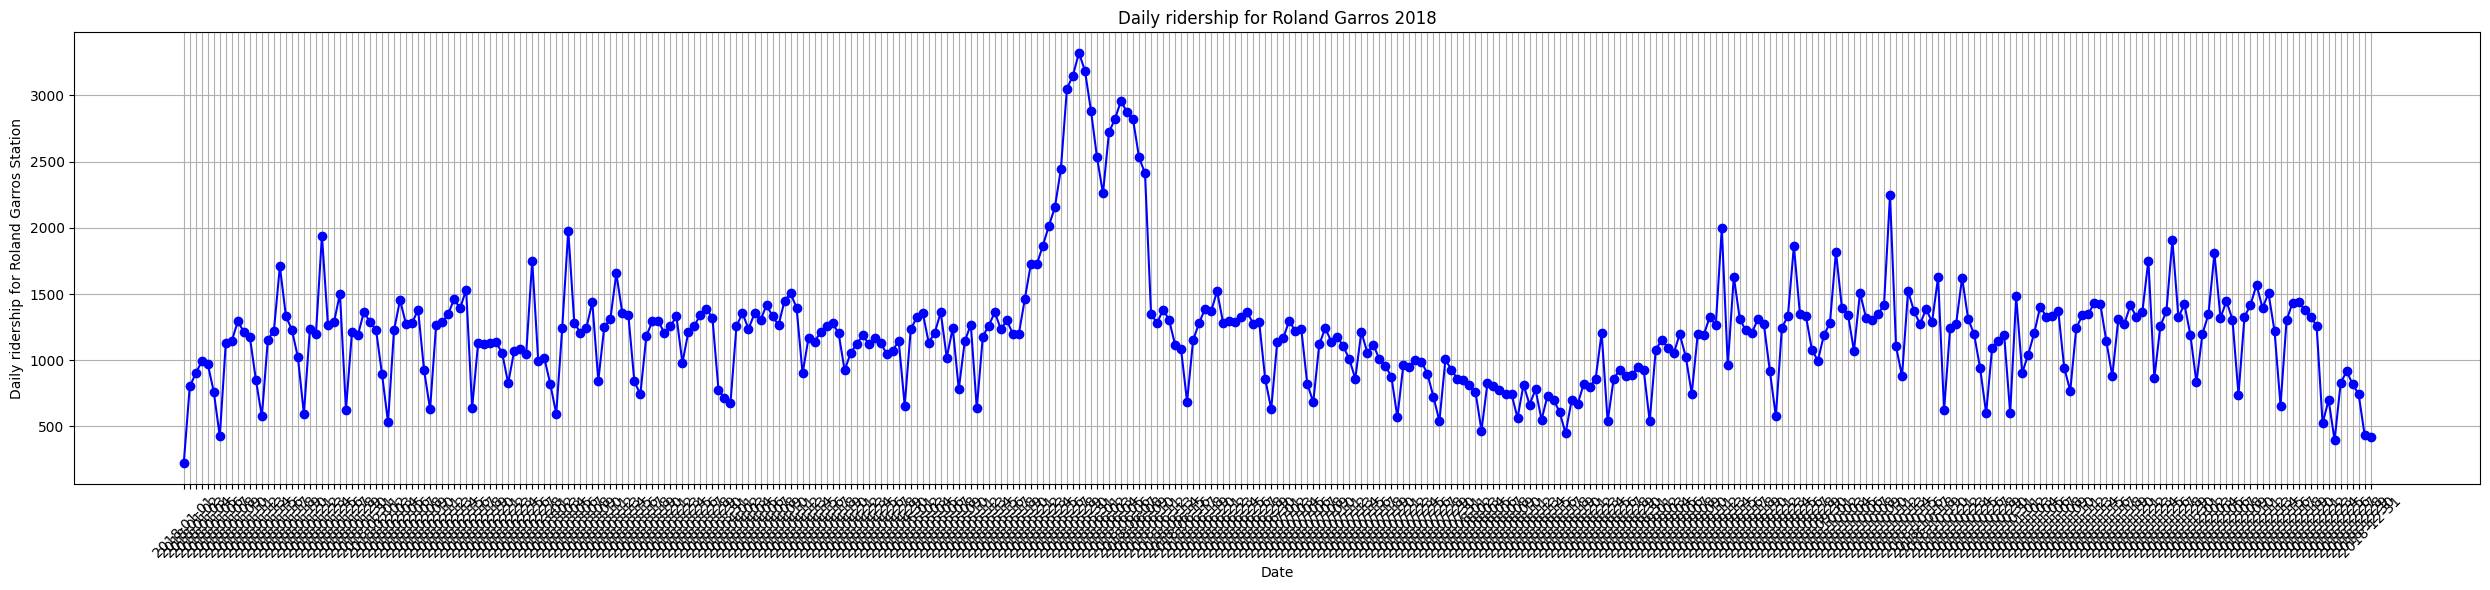

In [61]:
csv_path_2018_s1 = "../data/2018_S1_NB_FER.txt"
df_2018_s1 = pd.read_csv(csv_path_2018_s1, delimiter='\t')
df_2018_s1['JOUR'] = pd.to_datetime(df_2018_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2018_s2 = "../data/2018_S2_NB_FER.txt"
df_2018_s2 = pd.read_csv(csv_path_2018_s2, delimiter='\t')
df_2018_s2['JOUR'] = pd.to_datetime(df_2018_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2018_raw = pd.concat([df_2018_s1, df_2018_s2])
df_2018_raw = df_2018_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2018_raw["TICKET_TYPE"] = df_2018_raw["TICKET_TYPE"].replace(fares_map)
df_2018_raw["COUNT"] = df_2018_raw["COUNT"].replace("Moins de 5", 4)
df_2018_raw["COUNT"] = df_2018_raw["COUNT"].astype(int)
# df_2018_raw[df_2018_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2018_raw = df_2018_raw[df_2018_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2018 = df_2018_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2018 = df_2018[["DATE", "STATION", "COUNT"]]
print(df_2018.head())
print(len(df_2018))
plt.figure(figsize=(25, 6))
plt.plot(df_2018["DATE"], df_2018["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2018")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT
0  2019-01-01  PORTE D'AUTEUIL    293
1  2019-01-02  PORTE D'AUTEUIL    868
2  2019-01-03  PORTE D'AUTEUIL    973
3  2019-01-04  PORTE D'AUTEUIL   1002
4  2019-01-05  PORTE D'AUTEUIL    894
362


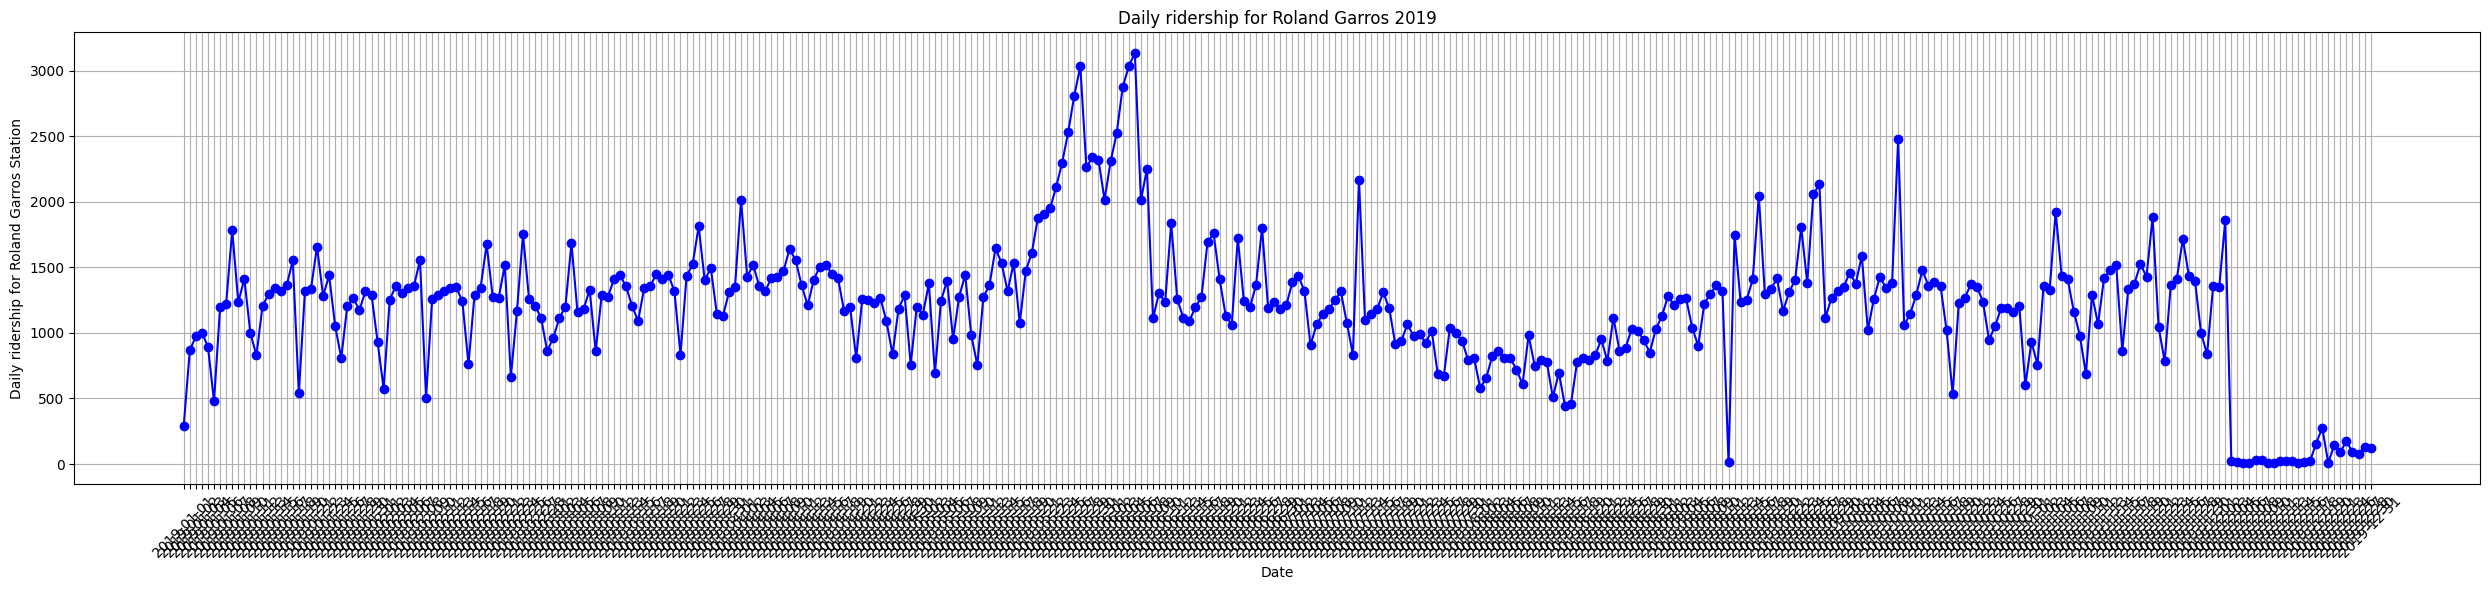

In [62]:
csv_path_2019_s1 = "../data/2019_S1_NB_FER.txt"
df_2019_s1 = pd.read_csv(csv_path_2019_s1, delimiter='\t')
df_2019_s1['JOUR'] = pd.to_datetime(df_2019_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2019_s2 = "../data/2019_S2_NB_FER.txt"
df_2019_s2 = pd.read_csv(csv_path_2019_s2, delimiter='\t')
df_2019_s2['JOUR'] = pd.to_datetime(df_2019_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2019_raw = pd.concat([df_2019_s1, df_2019_s2])
df_2019_raw = df_2019_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2019_raw["TICKET_TYPE"] = df_2019_raw["TICKET_TYPE"].replace(fares_map)
df_2019_raw["COUNT"] = df_2019_raw["COUNT"].replace("Moins de 5", 4)
df_2019_raw["COUNT"] = df_2019_raw["COUNT"].astype(int)
# df_2019_raw[df_2019_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2019_raw = df_2019_raw[df_2019_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2019 = df_2019_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2019 = df_2019[["DATE", "STATION", "COUNT"]]
print(df_2019.head())
print(len(df_2019))
plt.figure(figsize=(25, 6))
plt.plot(df_2019["DATE"], df_2019["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2019")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT
0  2020-01-02  PORTE D'AUTEUIL    132
1  2020-01-03  PORTE D'AUTEUIL    208
2  2020-01-04  PORTE D'AUTEUIL    196
3  2020-01-05  PORTE D'AUTEUIL    136
4  2020-01-06  PORTE D'AUTEUIL    428
365


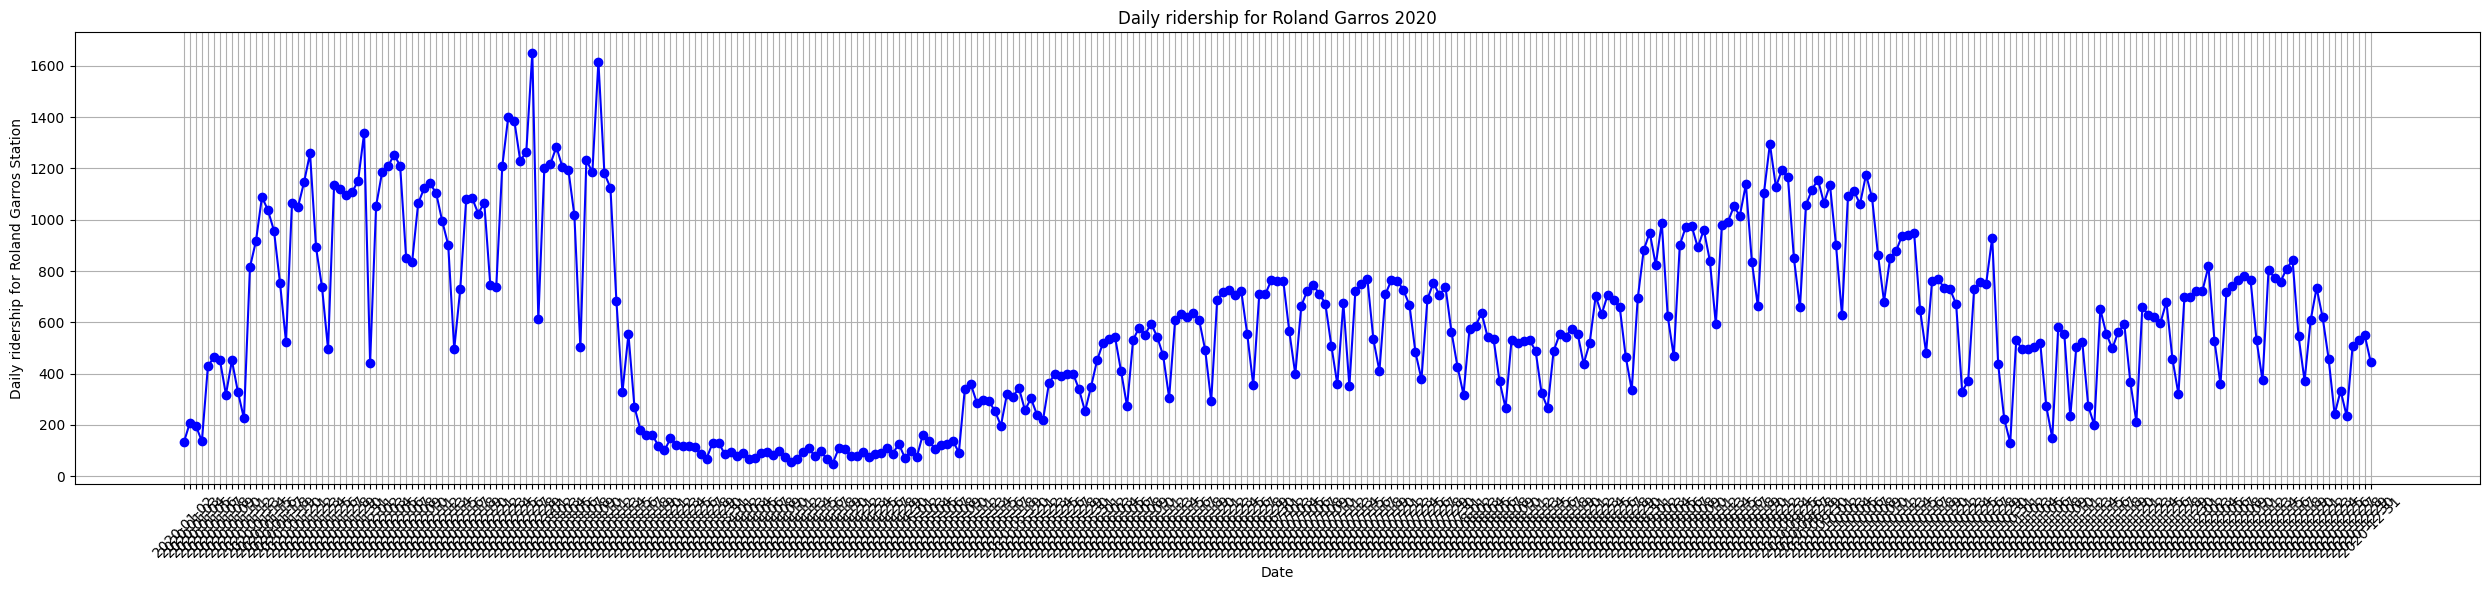

In [63]:
csv_path_2020_s1 = "../data/2020_S1_NB_FER.txt"
df_2020_s1 = pd.read_csv(csv_path_2020_s1, delimiter='\t')
df_2020_s1['JOUR'] = pd.to_datetime(df_2020_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2020_s2 = "../data/2020_S2_NB_FER.txt"
df_2020_s2 = pd.read_csv(csv_path_2020_s2, delimiter='\t')
df_2020_s2['JOUR'] = pd.to_datetime(df_2020_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2020_raw = pd.concat([df_2020_s1, df_2020_s2])
df_2020_raw = df_2020_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2020_raw["TICKET_TYPE"] = df_2020_raw["TICKET_TYPE"].replace(fares_map)
df_2020_raw["COUNT"] = df_2020_raw["COUNT"].replace("Moins de 5", 4)
df_2020_raw["COUNT"] = df_2020_raw["COUNT"].astype(int)
# df_2020_raw[df_2020_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2020_raw = df_2020_raw[df_2020_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2020 = df_2020_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2020 = df_2020[["DATE", "STATION", "COUNT"]]
print(df_2020.head())
print(len(df_2020))
plt.figure(figsize=(25, 6))
plt.plot(df_2020["DATE"], df_2020["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2020")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT
0  2021-01-01  PORTE D'AUTEUIL    213
1  2021-01-02  PORTE D'AUTEUIL    387
2  2021-01-03  PORTE D'AUTEUIL    312
3  2021-01-04  PORTE D'AUTEUIL    698
4  2021-01-05  PORTE D'AUTEUIL    714
365


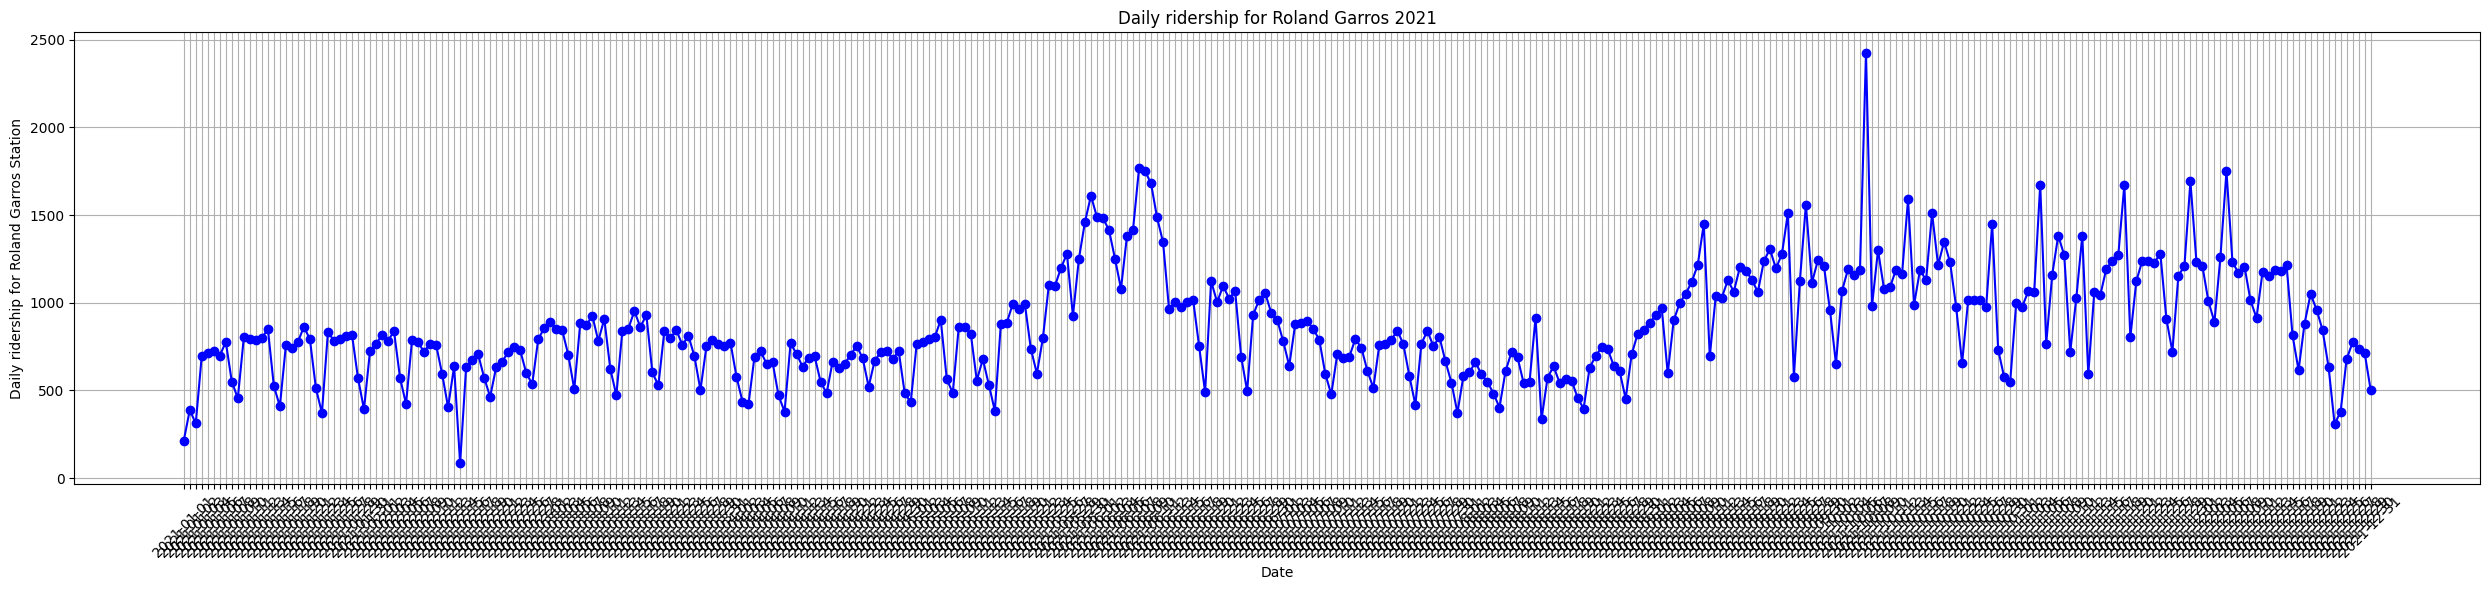

In [64]:
csv_path_2021_s1 = "../data/2021_S1_NB_FER.txt"
df_2021_s1 = pd.read_csv(csv_path_2021_s1, delimiter='\t')
df_2021_s1['JOUR'] = pd.to_datetime(df_2021_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2021_s2 = "../data/2021_S2_NB_FER.txt"
df_2021_s2 = pd.read_csv(csv_path_2021_s2, delimiter='\t')
df_2021_s2['JOUR'] = pd.to_datetime(df_2021_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2021_raw = pd.concat([df_2021_s1, df_2021_s2])
df_2021_raw = df_2021_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2021_raw["TICKET_TYPE"] = df_2021_raw["TICKET_TYPE"].replace(fares_map)
df_2021_raw["COUNT"] = df_2021_raw["COUNT"].replace("Moins de 5", 4)
df_2021_raw["COUNT"] = df_2021_raw["COUNT"].astype(int)
# df_2021_raw[df_2021_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2021_raw = df_2021_raw[df_2021_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2021 = df_2021_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2021 = df_2021[["DATE", "STATION", "COUNT"]]
print(df_2021.head())
print(len(df_2021))
plt.figure(figsize=(25, 6))
plt.plot(df_2021["DATE"], df_2021["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2021")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT
0  2022-01-01  PORTE D'AUTEUIL    351
1  2022-01-02  PORTE D'AUTEUIL    441
2  2022-01-03  PORTE D'AUTEUIL    984
3  2022-01-04  PORTE D'AUTEUIL    971
4  2022-01-05  PORTE D'AUTEUIL    958
362


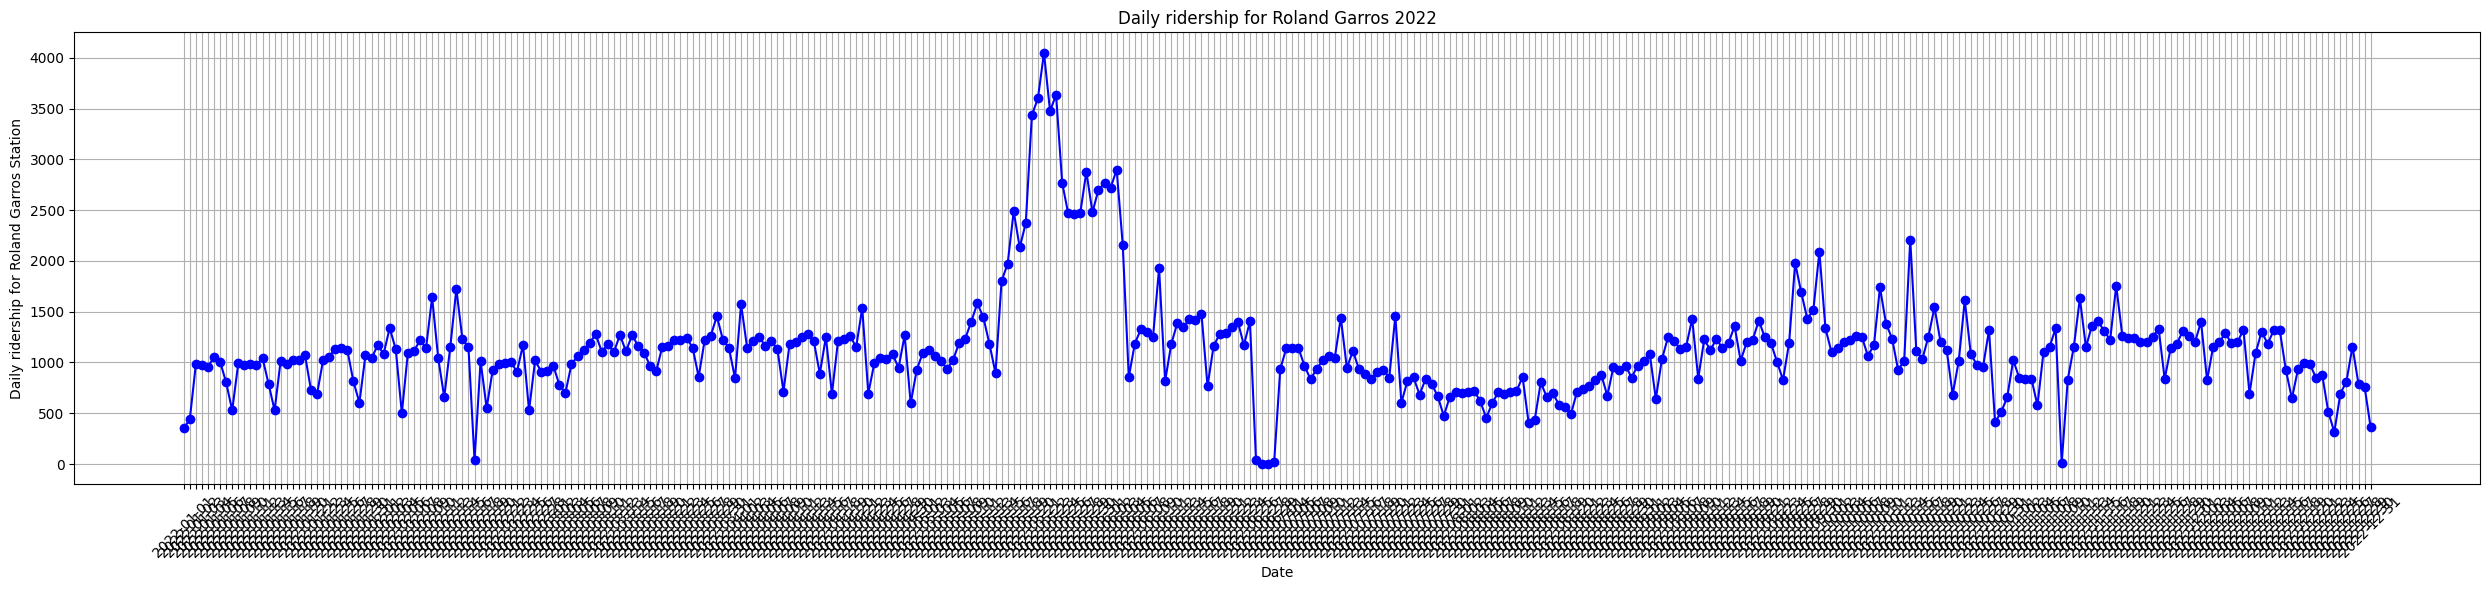

In [65]:
csv_path_2022_s1 = '../data/2022_S1_NB_FER.txt'
df_2022_s1 = pd.read_csv(csv_path_2022_s1, delimiter='\t')
df_2022_s1['JOUR'] = pd.to_datetime(df_2022_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2022_s2 = '../data/2022_S2_NB_FER.txt'
df_2022_s2 = pd.read_csv(csv_path_2022_s2, delimiter=';')
df_2022_s2['JOUR'] = pd.to_datetime(df_2022_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2022_raw = pd.concat([df_2022_s1, df_2022_s2])
df_2022_raw = df_2022_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2022_raw["TICKET_TYPE"] = df_2022_raw["TICKET_TYPE"].replace(fares_map)
df_2022_raw["COUNT"] = df_2022_raw["COUNT"].replace("Moins de 5", 4)
df_2022_raw["COUNT"] = df_2022_raw["COUNT"].astype(int)
# df_2022_raw[df_2022_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2022_raw["STATION"] = df_2022_raw["STATION"].replace("PTE D'AUTEUIL ", "PORTE D'AUTEUIL")
df_2022_raw = df_2022_raw[df_2022_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2022 = df_2022_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2022 = df_2022[["DATE", "STATION", "COUNT"]]
print(df_2022.head())
print(len(df_2022))
plt.figure(figsize=(25, 6))
plt.plot(df_2022["DATE"], df_2022["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2022")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

        DATE          STATION  COUNT
0 2023-01-01  PORTE D'AUTEUIL    268
1 2023-01-02  PORTE D'AUTEUIL    815
2 2023-01-03  PORTE D'AUTEUIL    920
3 2023-01-04  PORTE D'AUTEUIL   1087
4 2023-01-05  PORTE D'AUTEUIL   1057
181


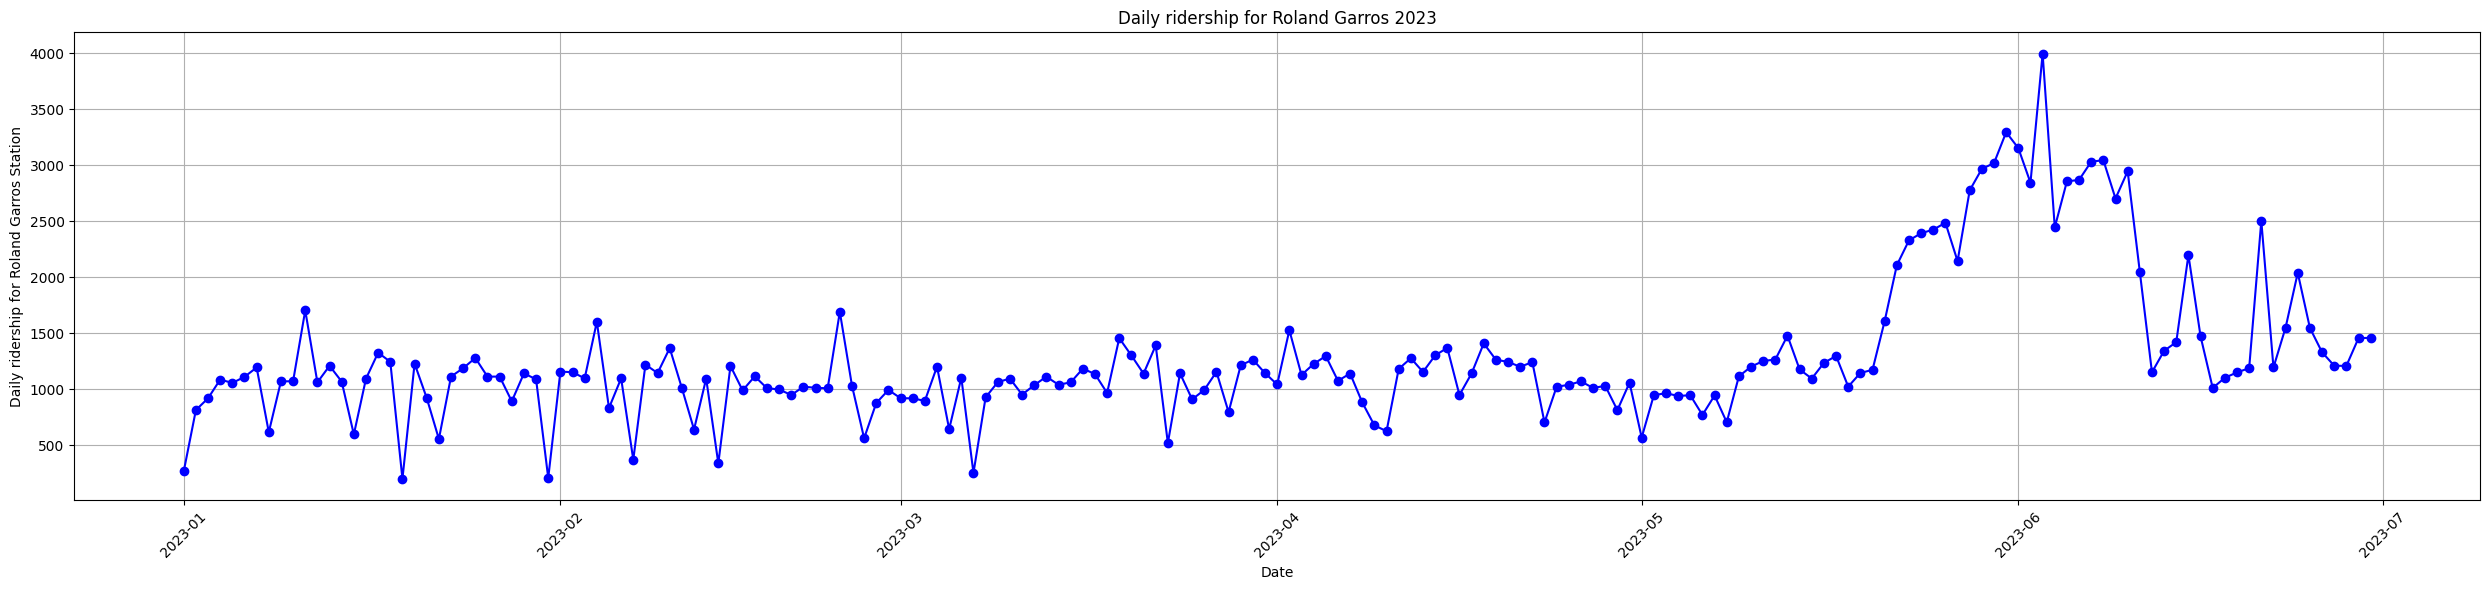

In [66]:
csv_path_2023_s1 = '../data/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre.csv'
df_2023_s1 = pd.read_csv(csv_path_2023_s1, delimiter=';')
df_2023_s1['JOUR'] = pd.to_datetime(df_2023_s1['JOUR'])

df_2023_raw = pd.concat([df_2023_s1])
df_2023_raw = df_2023_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2023_raw["TICKET_TYPE"] = df_2023_raw["TICKET_TYPE"].replace(fares_map)
df_2023_raw["COUNT"] = df_2023_raw["COUNT"].replace("Moins de 5", 4)
df_2023_raw["COUNT"] = df_2023_raw["COUNT"].astype(int)
df_2023_raw["STATION"] = df_2023_raw["STATION"].replace("PTE D'AUTEUIL", "PORTE D'AUTEUIL")
df_2023_raw = df_2023_raw[df_2023_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2023 = df_2023_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2023 = df_2023[["DATE", "STATION", "COUNT"]]
print(df_2023.head())
print(len(df_2023))
plt.figure(figsize=(25, 6))
plt.plot(df_2023["DATE"], df_2023["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2023")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Build Model

1. 2015 French Open: May 24 – Jun 7
2. 2016 French Open: May 22 – Jun 5
3. 2017 French Open: May 28 – Jun 11
4. 2018 French Open: May 27 – Jun 10
5. 2019 French Open: May 26 – Jun 9
6. 2020 French Open: Sep 24 – Oct 7 (COVID no attendance, should be remove)
7. 2021 French Open: May 30 – Jun 13 (the data seems to be affected by COVID too)
8. 2022 French Open: May 22 – Jun 5
3. 2023 French Open: May 28 – Jun 11

### Create Train and Test Data

In [67]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

In [68]:
scaler = MinMaxScaler()
counts = pd.concat([df_2015["COUNT"], df_2016["COUNT"], df_2017["COUNT"], df_2018["COUNT"], df_2019["COUNT"], df_2020["COUNT"], df_2021["COUNT"], df_2022["COUNT"], df_2023["COUNT"]]).values
scaler.fit(counts.reshape(-1, 1))

MinMaxScaler()

In [118]:
# index = df_2016[df_2016["DATE"] == "2016-02-29"].index
# df_2016 = df_2016.drop(index)

# index = df_2020[df_2020["DATE"] == "2020-02-29"].index
# df_2020 = df_2020.drop(index)

# since 2015 March is missing two days 3/21 and 3/22, we need to put some value in it.
if not (df_2015[df_2015["DATE"] == "2015-03-21"].values.any() and df_2015[df_2015["DATE"] == "2015-03-22"].values.any()):
    new_data = {
        "DATE": ["2015-03-21", "2015-03-22"],
        "STATION": ["PORTE D'AUTEUIL", "PORTE D'AUTEUIL"],
        "COUNT": [df_2015[df_2015["DATE"] == "2015-03-14"]["COUNT"].values[0], df_2015[df_2015["DATE"] == "2015-03-15"]["COUNT"].values[0]]
    }
    new_df = pd.DataFrame(new_data)
    df_2015 = pd.concat([df_2015, new_df], ignore_index=True)
    df_2015.sort_values(by=['DATE'], inplace=True)

french_open_data = {
    2015: df_2015,
    2016: df_2016,
    2017: df_2017,
    2018: df_2018,
    2019: df_2019,
    # 2021: df_2021,
    2022: df_2022,
    2023: df_2023
}

In [119]:
for key, df in french_open_data.items():
    df["COUNT_SCALE"] = scaler.transform(df["COUNT"].values.reshape(-1, 1))

start_dates = ["2015-05-24", "2016-05-22", "2017-05-28", "2018-05-27", "2019-05-26", "2022-05-22", "2023-05-29"]
end_dates = ["2015-06-07", "2016-06-05", "2017-06-11", "2018-06-10", "2019-06-09", "2022-06-05", "2023-06-12"] # for 2023, to make the length same I use 12th for end date

# ensure no data lost
for idx, (year, data) in enumerate(french_open_data.items()):
    print("{}: {} days".format(year, len(data[(data["DATE"] >= start_dates[idx]) & (data["DATE"] <= end_dates[idx])])))

2015: 15 days
2016: 15 days
2017: 15 days
2018: 15 days
2019: 15 days
2022: 15 days
2023: 15 days


In [120]:
french_open_days = 15

years = list(french_open_data.keys())
dataset1 = []
for idx in range(2, len(years)):
    first = french_open_data[years[idx - 2]]
    first = first[(first["DATE"] >= start_dates[idx - 2]) & (first["DATE"] <= end_dates[idx - 2])]

    second = french_open_data[years[idx - 1]]
    second = second[(second["DATE"] >= start_dates[idx - 1]) & (second["DATE"] <= end_dates[idx - 1])]

    third = french_open_data[years[idx]]
    third = third[(third["DATE"] >= start_dates[idx]) & (third["DATE"] <= end_dates[idx])]

    for i in range(french_open_days):
        first_day = first.iloc[i]["COUNT_SCALE"]
        second_day = second.iloc[i]["COUNT_SCALE"]
        third_day = third.iloc[i]["COUNT_SCALE"]
        dataset1.append([first_day, second_day, third_day])

dataset1 = np.array(dataset1)
dataset1.shape

(75, 3)

In [121]:
# Add non-French Open data (start from first Sunday of each year)
start_dates2 = ["2015-01-04", "2016-01-03", "2017-01-01", "2018-01-07", "2019-01-06", "2022-01-03", "2023-01-02"]
end_dates2 = ["2015-05-21", "2016-05-19", "2017-05-18", "2018-05-24", "2019-05-23", "2022-05-20", "2023-05-19"]


for idx, (year, data) in enumerate(french_open_data.items()):
    print("{}: {} days".format(year, len(data[(data["DATE"] >= start_dates2[idx]) & (data["DATE"] <= end_dates2[idx])])))

2015: 138 days
2016: 138 days
2017: 138 days
2018: 138 days
2019: 138 days
2022: 138 days
2023: 138 days


In [122]:
days = 138
dataset2 = []
for idx in range(2, len(years)):
    first = french_open_data[years[idx - 2]]
    first = first[(first["DATE"] >= start_dates2[idx - 2]) & (first["DATE"] <= end_dates2[idx - 2])]

    second = french_open_data[years[idx - 1]]
    second = second[(second["DATE"] >= start_dates2[idx - 1]) & (second["DATE"] <= end_dates2[idx - 1])]

    third = french_open_data[years[idx]]
    third = third[(third["DATE"] >= start_dates2[idx]) & (third["DATE"] <= end_dates2[idx])]
    for i in range(days):
        first_day = first.iloc[i]["COUNT_SCALE"]
        second_day = second.iloc[i]["COUNT_SCALE"]
        third_day = third.iloc[i]["COUNT_SCALE"]
        dataset2.append([first_day, second_day, third_day])

dataset = np.concatenate((dataset1, dataset2), axis=0)
dataset.shape

(765, 3)

Scale the data to 0-1

In [123]:
dataset_x, dataset_y = dataset[:, :-1], dataset[:, [-1]]
print("dataset shape: ", dataset_x.shape, dataset_y.shape)
train_x, validate_x, train_y, validate_y = train_test_split(dataset_x, dataset_y, test_size=0.1, shuffle=True)
print("after split:", train_x.shape, train_y.shape, validate_x.shape, validate_y.shape)

dataset shape:  (765, 2) (765, 1)
after split: (688, 2) (688, 1) (77, 2) (77, 1)


In [124]:
# build model
model = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model.fit(train_x, train_y[:, 0])

SVR(C=10, epsilon=0.05, gamma=0.5)

### Evaluate Model

In [125]:
def mean_absolute_percentage_error(pred, gt):
    pred = np.array(pred).flatten()
    gt = np.array(gt).flatten()
    return (np.absolute(pred - gt) / gt).mean()

train mape:  0.2523193162314567


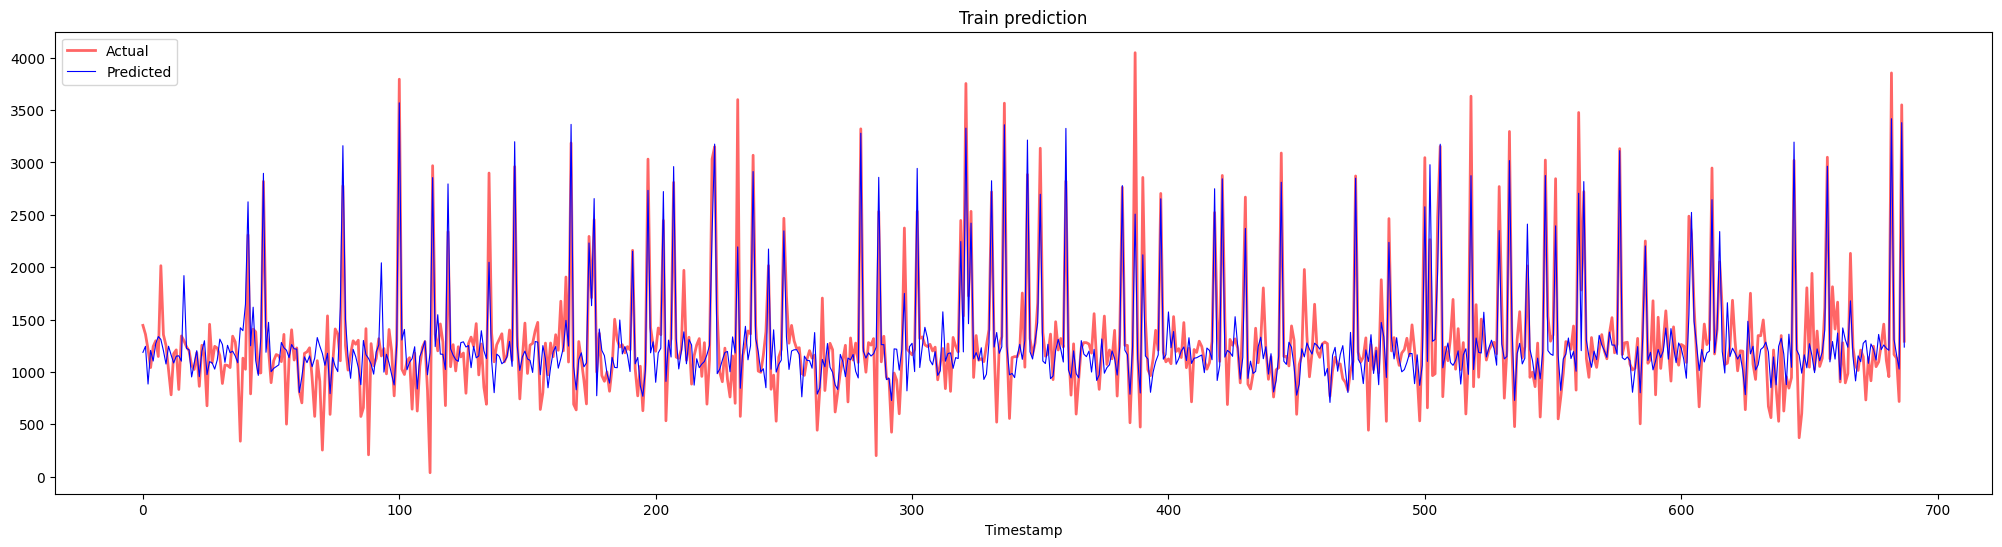

In [126]:
# evaluate train data
train_pred = model.predict(train_x).reshape(-1,1)
y_train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform(train_y)
print("train mape: ", mean_absolute_percentage_error(y_train_pred, y_train))

plt.figure(figsize=(25,6))
plt.plot(range(len(train_x)), y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(train_x)), y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Train prediction")
plt.show()

validate mape:  0.2133218730298698


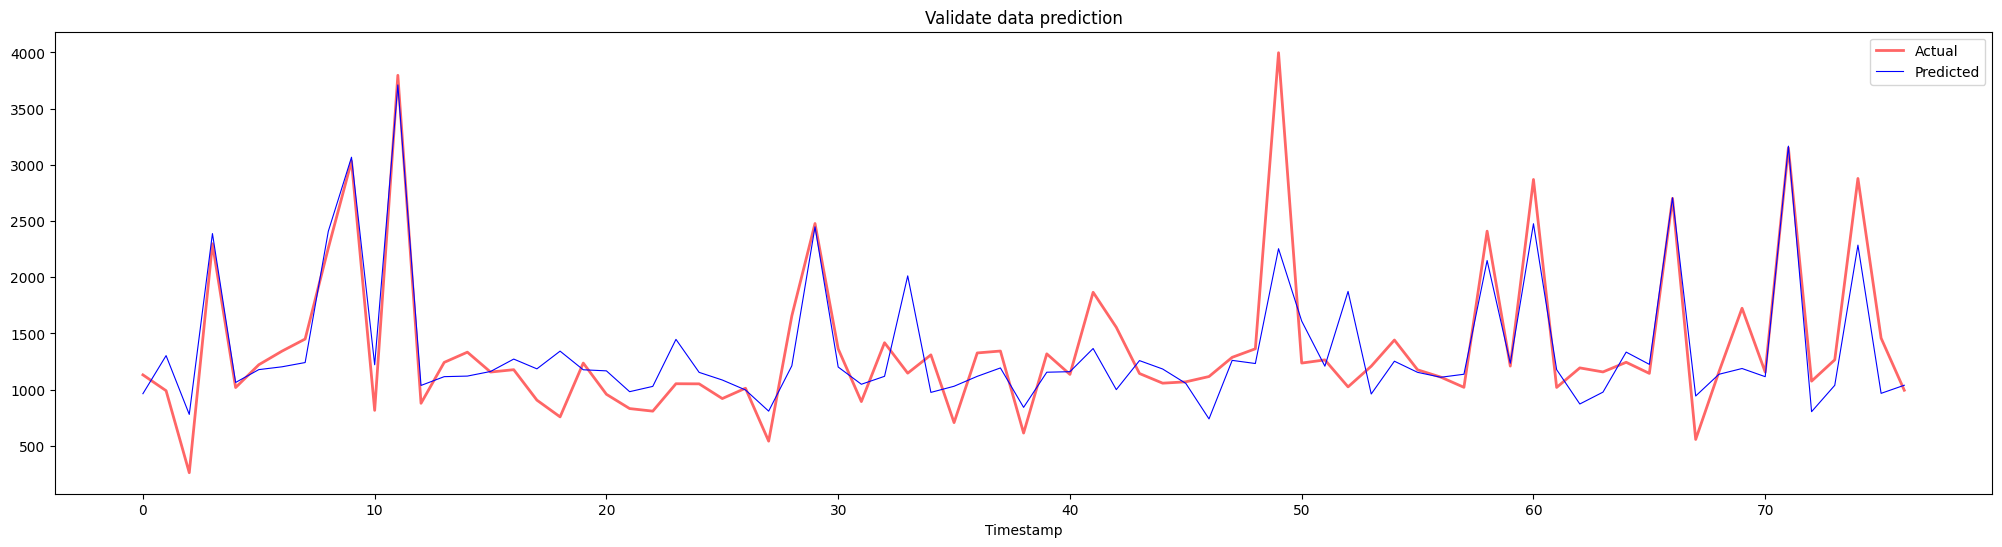

In [127]:
# evaluate validate data
validate_pred = model.predict(validate_x).reshape(-1,1)
y_validate_pred = scaler.inverse_transform(validate_pred)
y_validate = scaler.inverse_transform(validate_y)
print("validate mape: ", mean_absolute_percentage_error(y_validate_pred, y_validate))

plt.figure(figsize=(25,6))
plt.plot(range(len(validate_x)), y_validate, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(validate_x)), y_validate_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Validate data prediction")
plt.show()

In [128]:
test_data = []

start_dates3 = ["2022-05-22", "2023-05-29"]
end_dates3 = ["2022-06-05", "2023-06-12"]

first = french_open_data[2022]
first = first[(first["DATE"] >= "2022-05-22") & (first["DATE"] <= "2022-06-05")]

second = french_open_data[2023]
second = second[(second["DATE"] >= "2023-05-29") & (second["DATE"] <= "2023-06-12")]

for i in range(french_open_days):
    first_day = first.iloc[i]["COUNT_SCALE"]
    second_day = second.iloc[i]["COUNT_SCALE"]
    test_data.append([first_day, second_day])

test_data = np.array(test_data)
test_data.shape

(15, 2)

[[2850.28135618]
 [2844.68817412]
 [3052.62485448]
 [2969.16439897]
 [2634.81279083]
 [3138.56549615]
 [2288.87935728]
 [2536.04002072]
 [2682.3030397 ]
 [2637.89798118]
 [2732.72062229]
 [2546.02353177]
 [2679.83875486]
 [2161.35735022]
 [1433.64057217]]


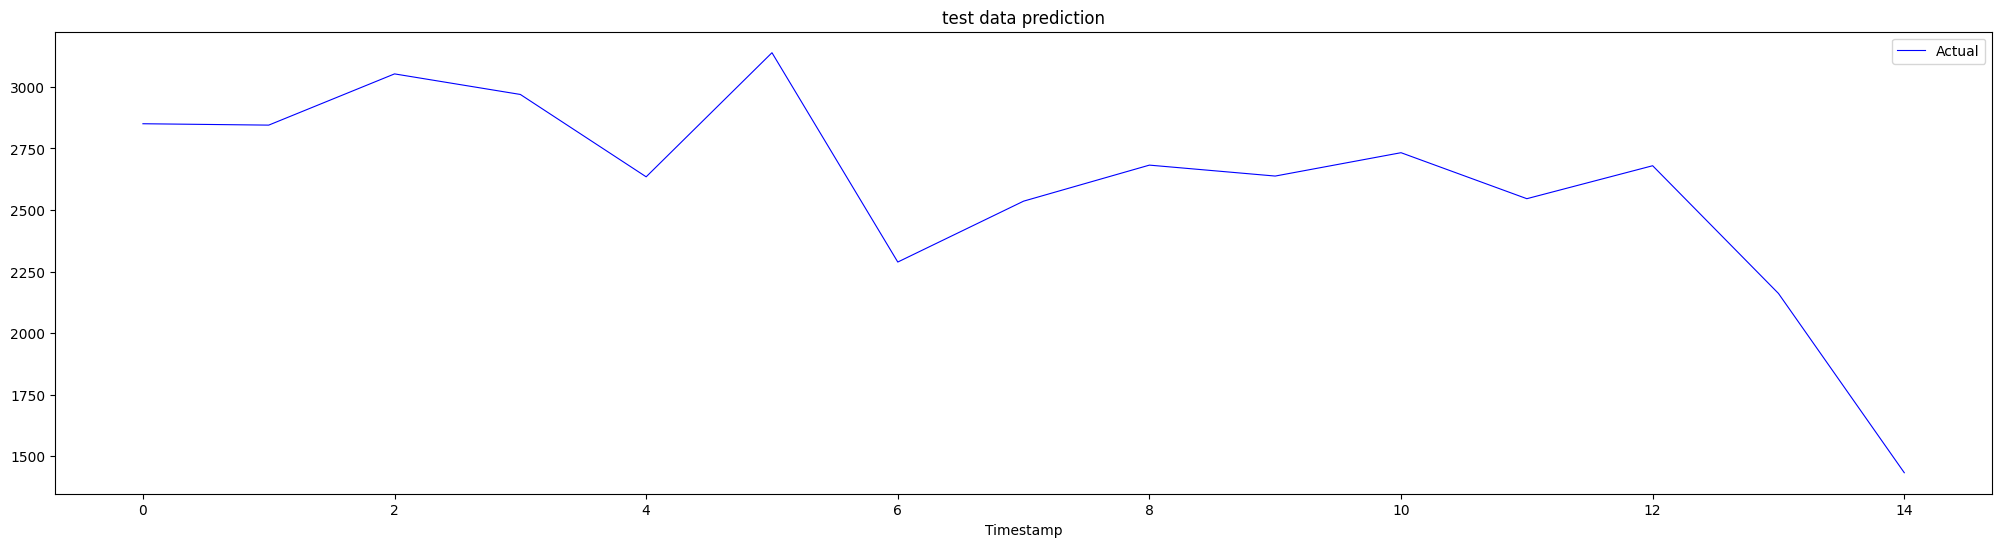

In [130]:
test_pred = model.predict(test_data).reshape(-1,1)
y_test_pred = scaler.inverse_transform(test_pred)
print(y_test_pred)
plt.figure(figsize=(25,6))
plt.plot(range(len(test_data)), y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("test data prediction")
plt.show()